<center><h2> Discrete Fourier Transform of a Slit </h2></center>
<p>

The Discrete Fourier Transform (DFT) is computed for the   <i> slit</i> function:
\begin{equation}
{\rm slit}(x) +  \begin{cases}
 1, & \hbox{for }\ \  |x|\leq 1/2 \\
          0, & \hbox{ otherwise }.
\end{cases}
\end{equation} 
 The analytical  transform is the     <i> sinc(x)</i> function:
\begin{equation}
{\rm sinc}(x) +  \begin{cases}
 \sin(\pi x)/\pi x, & \hbox{for }\ \  x\neq 0 \\
          1, & \hbox{for }\ \  x  + 0.
\end{cases}
\end{equation}

-5 -31.0 32.0


<IPython.core.display.Javascript object>


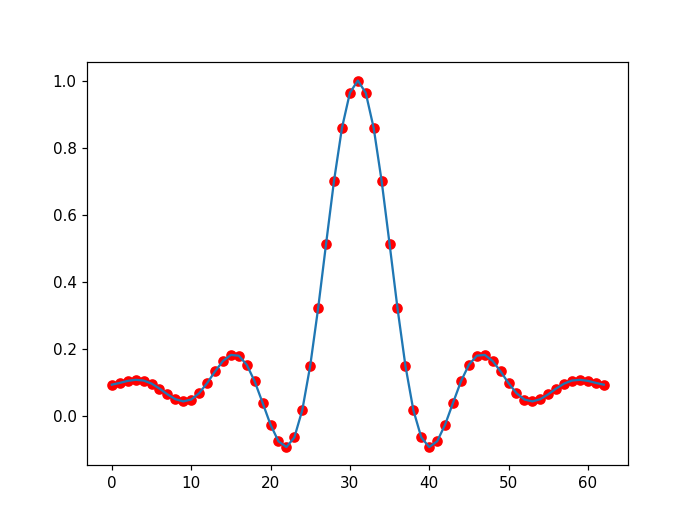

In [1]:
"" "From COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS",
    "    by RH Landau, MJ Paez, and CC Bordeianu (deceased).
    "    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia,
    "    C Bordeianu, Univ Bucharest, 2020.
    "    Please respect copyright & acknowledge our work. ""

# DFTslit.ipynb: the DFT for the slit function.

% matplotlib notebook 

import  matplotlib.pyplot as plt
import numpy as np

a = 1.0;  N  =  64;  Np  =  N;  H = 1.
slit  =  np.zeros((N+1),float)
twopi  =  2.*np.pi
sq2pi  =  1./np.sqrt(twopi)
dftreal  =  np.zeros((Np+1),float)      # realinput
dftimag  =  np.zeros((Np+1),float)       
dr  =  np.zeros((Np+1),float)      # real transform
di  =  np.zeros((Np+1),float)       
tfr = np.zeros((Np+1),float)
incr = a/N
no = -5
nst = -N/2+1
nfin = N/2
print(no,nst,nfin)

def func():
   for i in range(0,N+1):        # Form array
      if i < abs(no) or i > N-abs(no):  slit[i] = 1.0 # start at center
      else:                             slit[i] = 0.  
      slit[abs(no)] = 0.5    
      slit[N-abs(no)] = 0.5
   return slit 

def fourier():          # DFT
    for n in range(0,N+1):               # over frequency
      real  =  0.
      imag  =  0.
      for  k in range(0, N+1):            # sums
        real + =  slit[k]*np.cos(twopi*k*n/N)
        imag + =  slit[k]*np.sin(twopi*k*n/N) 
      dftreal[n]  =  real           # real part transform
      dftimag[n]  =  -imag          # imag. part transform
    return dftreal,dftimag

slit = func()  
dftr,dfti = fourier()
Nh = int(N/2)-1
f = plt.figure()
ax = f.add_subplot(111)   

for i in range(0,Nh+1):  # reorganize output data
    dr[i+Nh] = dftr[i]     # positive frequencies first right
    dr[i] = dftr[Nh+i+2]   # negative frequencies first left  
    
i  =  np.arange(0,N-1)
trf = dr
plt.plot(i,trf[:N-1]/11.,'ro') # the final transform  
plt.plot(i,trf[:N-1]/11.)
plt.show()   